In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


In [4]:
# read dataset and show first 5 rows in dataframe
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Explore Data**

In [5]:
# show cloumns in data
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# check Is there any missing data or not?
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Age**

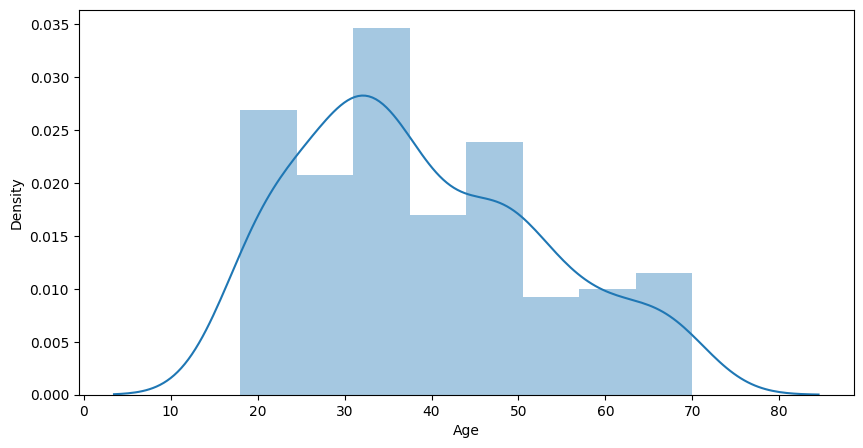

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'])
plt.show()

In [28]:
df[df['Age']>30].count() | df[df['Spending Score (1-100)']<100].count()

,0
CustomerID,202
Gender,202
Age,202
Annual Income (k$),202
Spending Score (1-100),202


# Gender


In [32]:
 # show value count in Gender
 Gender_df = df.Gender.value_counts()

In [33]:
Gender_df

,count
Gender,
Female,112
Male,88


In [47]:
color = ['#57564F','#DDDAD0','#F8F3CE']

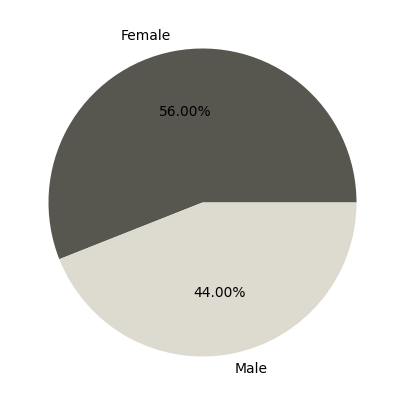

In [48]:
# visualization Gender with pie Chart
plt.figure(figsize=(10,5))
plt.pie(Gender_df,labels=Gender_df.index,autopct='%1.2f%%', colors=color)
plt.show()

In [68]:
# Average age for Annual Income
df_annul_gender = df.groupby('Gender').mean()['Annual Income (k$)']

In [69]:
df_annul_gender

,Annual Income (k$)
Gender,
Female,59.250000
Male,62.227273


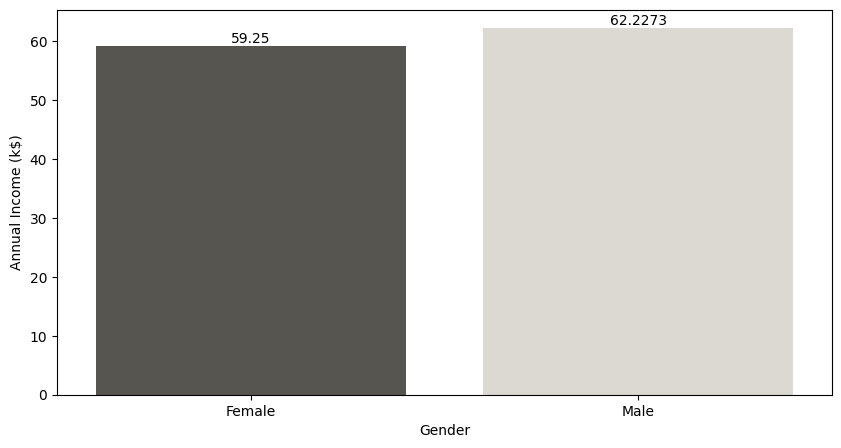

In [70]:
# visualization Average age for Annual Income  with bar plot

plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_annul_gender.index,y=df_annul_gender,palette=color)
for p in ax.containers:
    ax.bar_label(p)

plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

In [74]:
# counting Gender for Spending Score (1-100)
df_Spending_gender = df.groupby('Gender').count()['Spending Score (1-100)']

In [76]:
df_Spending_gender

,Spending Score (1-100)
Gender,
Female,112
Male,88


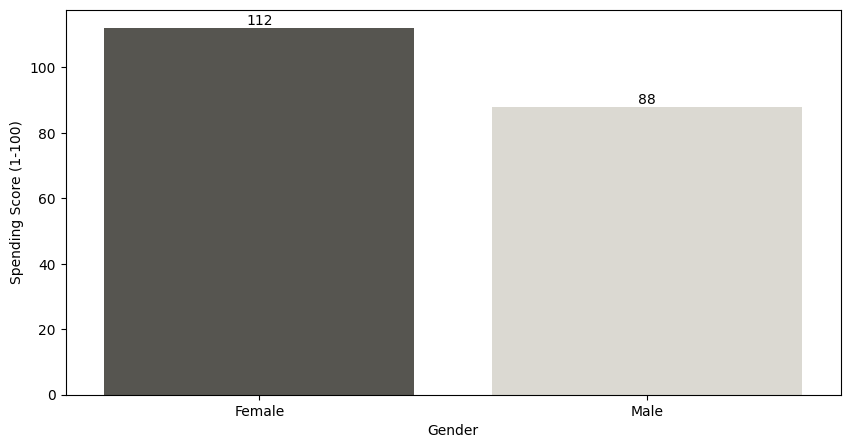

In [77]:
# visualization Average age for Spending Score (1-100)  with bar plot

plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_Spending_gender.index,y=df_Spending_gender,palette=color)
for p in ax.containers:
    ax.bar_label(p)

plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [79]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Annual Income (k$)

In [83]:
df['Annual Income (k$)'].mean()

np.float64(60.56)

In [86]:
df['Spending Score (1-100)'].mean()

np.float64(50.2)

In [87]:
# Featuer data
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [88]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [91]:
# find sum of cluster is true
sum_of_squared_distances = []
for i in range(1,20):
    km = KMeans(n_clusters=i, random_state=42)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

Text(0, 0.5, 'sum_of_squared_distances')

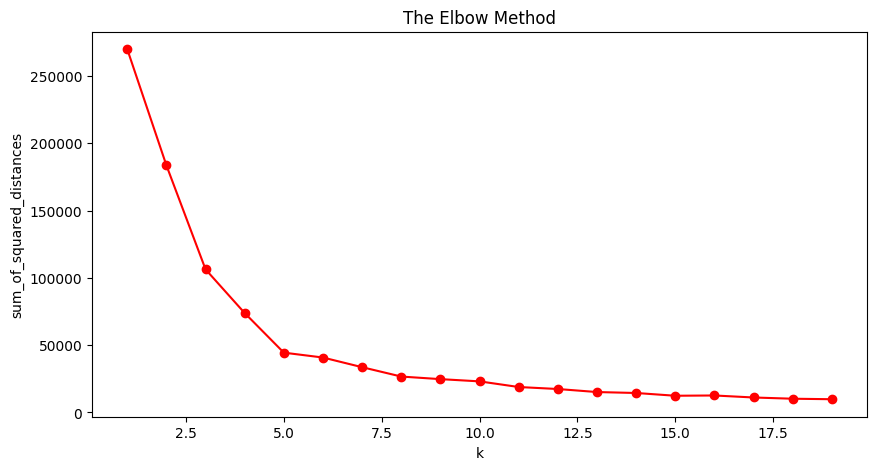

In [100]:
plt.figure(figsize=(10,5))
plt.plot(range(1,20), sum_of_squared_distances, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')

In [101]:
# optomim Number of clusters
Kmeans = KMeans(n_clusters=5)
y_predict = Kmeans.fit_predict(X)

In [135]:
df['Cluster'] = Kmeans.labels_

In [137]:
df['Cluster']

,Cluster
0,4
1,0
2,4
3,0
4,4
...,...
195,2
196,1
197,2
198,1


In [140]:
numeric_cols = df.select_dtypes(include=['number']).columns

numeric_cols = numeric_cols.drop('Cluster', errors='ignore')

cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

print(cluster_summary)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         23.090909  25.272727           25.727273               79.363636
1        164.371429  41.114286           88.200000               17.114286
2        162.000000  32.692308           86.538462               82.128205
3         86.320988  42.716049           55.296296               49.518519
4         23.000000  45.217391           26.304348               20.913043


In [143]:
cluster_summary = df.groupby('Cluster')[numeric_cols].agg(['min', 'max'])

print(cluster_summary)

        CustomerID      Age     Annual Income (k$)       \
               min  max min max                min  max   
Cluster                                                   
0                2   46  18  35                 15   39   
1              125  199  19  59                 70  137   
2              124  200  27  40                 69  137   
3               44  143  18  70                 39   76   
4                1   45  19  67                 15   39   

        Spending Score (1-100)      
                           min max  
Cluster                             
0                           61  99  
1                            1  39  
2                           63  97  
3                           34  61  
4                            3  40  


Cluster 0:
Represents young customers aged between 18 and 35, with low income (15k–39k) but high spending scores (61–99).
These are likely students or young professionals who spend generously despite limited income.

Cluster 1:
Contains high-income individuals (70k–137k) aged between 19 and 59, but with low spending scores (1–39).
This group may include wealthy but conservative shoppers who are selective with their purchases.

Cluster 2:
Includes affluent customers with both high income (69k–137k) and high spending scores (63–97), typically aged 27 to 40.
They are ideal targets for premium products and luxury offerings.

Cluster 3:
Consists of a broad age range (18–70) with moderate income (39k–76k) and medium spending scores (34–61).
These are average shoppers with balanced behavior, neither overly frugal nor extravagant.

Cluster 4:
Composed of customers aged 19 to 67 with low income (15k–39k) and low spending scores (3–40).
This group is likely budget-conscious and less likely to spend on non-essential items.



In [102]:
y_predict

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

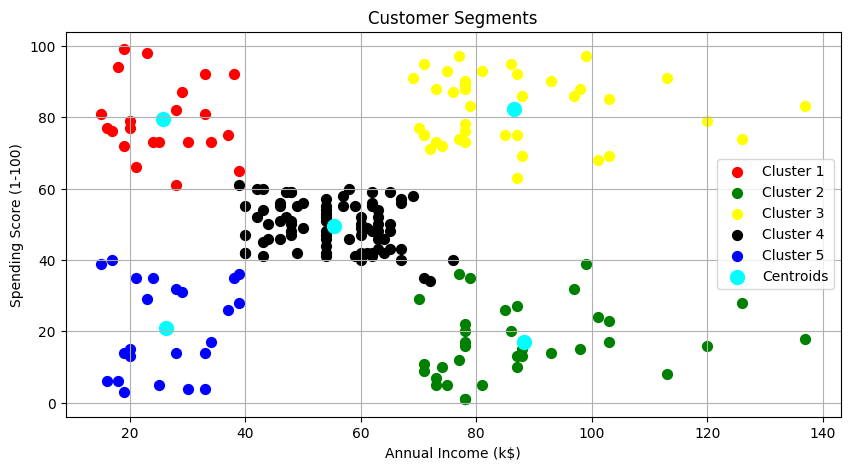

In [106]:
# convert to numpyarry
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.figure(figsize=(10, 5))

plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=50, c="red", label='Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=50, c="green", label='Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=50, c="yellow", label='Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s=50, c="black", label='Cluster 4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s=50, c="blue", label='Cluster 5')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')  # كان مكتوب cayn

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


In [107]:
# Data partitioning for training and testing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
y = y_predict

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
# Creat Model ANN
Model = Sequential(
    [
        Dense(64, activation='relu', input_dim = 2),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')
    ]
)

Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [114]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=8,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3323 - loss: 3.3706 - val_accuracy: 0.6250 - val_loss: 1.3732
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5057 - loss: 1.1985 - val_accuracy: 0.6250 - val_loss: 0.8626
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5804 - loss: 0.7861 - val_accuracy: 0.5938 - val_loss: 0.7013
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5794 - loss: 0.8274 - val_accuracy: 0.5312 - val_loss: 0.6899
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5960 - loss: 0.6576 - val_accuracy: 0.4688 - val_loss: 0.7949
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5271 - loss: 0.9204 - val_accuracy: 0.5625 - val_loss: 0.7211
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5928 - loss: 0.8094 - val_accuracy: 0.4688 - val_loss: 0.9224
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5687 - loss: 0.7543 - val_accuracy: 0.4688 - 

In [146]:
Model.save('Mall_Coustomer.keras')

In [116]:
# evaluate Model
loss, accuracy = Model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9458 - loss: 0.1518 
Test Accuracy: 95.00%


In [118]:
# predict on a new customer
new_customer = np.array([[60, 40]])
prediction = Model.predict(new_customer)
cluster = tf.argmax(prediction, axis=1).numpy()[0]
print(f"Predicted Cluster: {cluster}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Predicted Cluster: 3


In [120]:
# Actual Cluster
real_cluster = Kmeans.predict(new_customer)[0]
print(f"Actual Cluster from KMeans: {real_cluster}")

Actual Cluster from KMeans: 3


In [148]:
pip install streamlit pandas scikit-learn matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [173]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Model = tf.keras.models.load_model('/content/Mall_Coustomer.h5')

st.title("Customer Segmentation Using ANN")

st.subheader("Enter Customer Information")

income = st.slider("Annual Income (k$)", 10, 150, 50)
Spending = st.slider("Spending Score (1-100)", 18, 100, 30)

if st.button("Predict Cluster"):
    new_customer = np.array([[income, Spending]])
    prediction = Model.predict(new_customer)
    cluster = tf.argmax(prediction, axis=1).numpy()[0]

    st.success(f"✅ Predicted Cluster: {cluster}")

    cluster_descriptions = {
        0: "Cluster 0: High Spending, Low Income",
        1: "Cluster 1: Low Spending, High Income",
        2: "Cluster 2: High Income, High Spending",
        3: "Cluster 3: Moderate Spending & Income",
        4: "Cluster 4: Low Income, Low Spending"
    }

    st.info(cluster_descriptions.get(cluster, "No description available for this cluster."))


Overwriting app.py


In [163]:
!pip install streamlit
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
changed 22 packages in 2s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [154]:
!pip install streamlit pyngrok


In [156]:
!ngrok config add-authtoken 2tABXL52IcMbMGedO4FLKAJ3E5E_2aiz2ghYGY46C2RrNKEhZ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [169]:
from pyngrok import ngrok

ngrok.set_auth_token("2tABXL52IcMbMGedO4FLKAJ3E5E_2aiz2ghYGY46C2RrNKEhZ")

In [171]:
from pyngrok import ngrok
ngrok.kill()


In [174]:
from pyngrok import ngrok
!streamlit run app.py &>/content/logs.txt &

public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)

Streamlit URL: NgrokTunnel: "https://d0022140292a.ngrok-free.app" -> "http://localhost:8501"
